#  **About** **Dataset**







Student Depression Dataset: Analyzing Mental Health Trends and Predictors Among Students

Overview
This dataset compiles a wide range of information aimed at understanding, analyzing, and predicting depression levels among students. It is designed for research in psychology, data science, and education, providing insights into factors that contribute to student mental health challenges and aiding in the design of early intervention strategies.


# Data Description



Format: CSV (each row represents an individual student)


Features:
* ID: Unique identifier for each student
* Demographics: Age, Gender, City
* Academic Indicators: CGPA, Academic Pressure, Study Satisfaction
* Lifestyle & Wellbeing: Sleep Duration, Dietary Habits, Work Pressure, Job
* Satisfaction, Work/Study Hours
* Additional Factors: Profession, Degree, Financial Stress, Family History of * * Mental Illness, and whether the student has ever had suicidal thoughts





# Target Variable:


* Depression_Status: A binary indicator (0/1 or Yes/No) that denotes whether a student is experiencing depression


# Key Highlights


* Research & Practical Applications: Ideal for developing predictive models, conducting statistical analyses, and informing mental health intervention strategies in educational environments.

# Usage & Potential Applications

* Academic Research: Explore correlations between academic pressures and mental health trends.
* Data Science Projects: Build predictive models to identify at-risk students based on various indicators.
* Policy Making: Inform the development of targeted mental health support programs within academic institution

# **Libraries**

In [1]:
import numpy as np #for numerical computatiions and array operations
import pandas as pd #for handling and manipulating structured data

#data visualization

import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations

#Data preprocessing & feature engineering
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variance=1)
from sklearn.preprocessing import MinMaxScaler #normaliazation (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder #encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer #handles missing values

#Dimentionality Reduction & feature selection

from sklearn.decomposition import PCA #principal component analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif #feature selection techniques

#Model Selection and Evaluation
from sklearn.model_selection import train_test_split #splits datasets into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #k-fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning usung grid search

#performance metrics

from sklearn.metrics import accuracy_score #Evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision,recall,F1-score summary
from sklearn.metrics import precision_score #Precision metric
from sklearn.metrics import recall_score #recall metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics #collection of evalution metrics

#Handling Imbalanced Datasets

from imblearn.over_sampling import SMOTE #Sybthetic Minority over-sampling technique (for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes

#Machine Learning Algorithms - Classification

from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.naive_bayes import GaussianNB #naive bayes classifier
from xgboost import XGBClassifier #Extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn.ensemble import ExtraTreesClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent classifier

#Utility Funtions

from sklearn.pipeline import make_pipeline #creates machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #Various model selection utilities
from sklearn import svm  #Support Vector Machines module
from sklearn import tree

# Reading the Data

In [2]:
import pandas as pd
df=pd.read_csv('student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


# Basic Understand

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.isnull()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27899,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [ ]:
df["id"].value_counts()

,count
id,
140699,1
2,1
8,1
26,1
30,1
...,...
132,1
120,1
106,1


In [ ]:
df["Sleep Duration"].value_counts()

,count
Sleep Duration,
'Less than 5 hours',8310
'7-8 hours',7346
'5-6 hours',6183
'More than 8 hours',6044
Others,18


#  **Data** **visualizations**

## Profession

In [ ]:
df["Profession"].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


## Gender

<ipython-input-171-38ac10c98bcc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel',edgecolor='k')


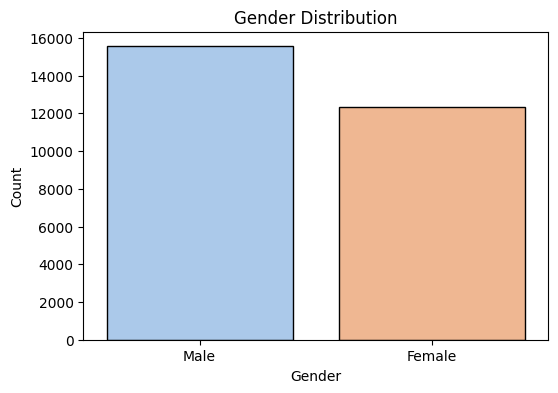

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel',edgecolor='k')

# Adding title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

 inference of gender distribution


 * 17000 above male

 * 12000 above female




## Depression  

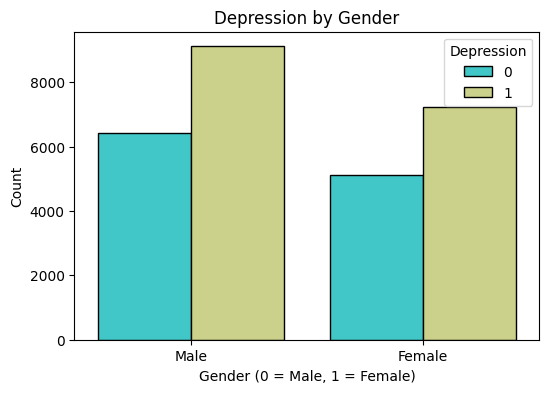

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Depression', data=df, palette='rainbow',edgecolor='k')
plt.title("Depression by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Count")
plt.show()

Inference from the Plot

Depression by Gender
This bar plot shows the count of individuals with and without depression, categorized by gender.

X-axis:

Gender: 0 = Male, 1 = Female

Y-axis:

Count of individuals

Legend:

Depression = 0 (No Depression)

Depression = 1 (Has Depression)

Observations:
Males (Gender 0):

A higher number of males have depression (Depression = 1) than those who don’t.

Depression cases are more frequent than non-depression cases among males.

Females (Gender 1):

Similar to males, more females are suffering from depression compared to those without it.

However, the total number of females (both with and without depression) seems to be less than males.

##  Sleep Duration

<ipython-input-174-6290c14fd1bd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=df['Sleep Duration'],palette='rainbow',edgecolor='k')


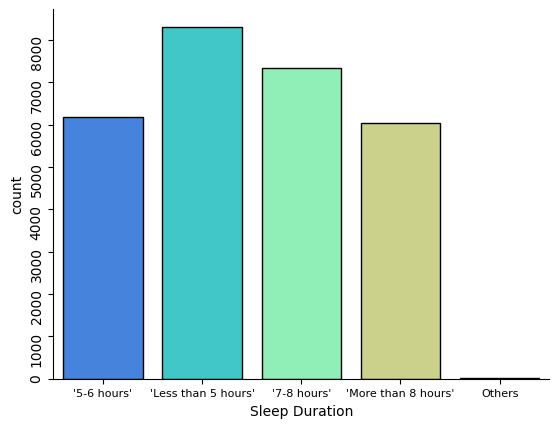

In [ ]:
cp=sns.countplot(x=df['Sleep Duration'],palette='rainbow',edgecolor='k')
plt.xticks(fontsize=14)
plt.yticks(rotation=90)
plt.xticks(fontsize=8)
sns.despine(top=True,right=True)

Visualization: Bar chart comparing sleep duration with depression status.

Inference:

Students who sleep less than 5 hours and 5-6 hours show a higher count of depression.

Students who sleep 7-8 hours have lower depression rates, suggesting adequate sleep may reduce depression.

Students with more than 8 hours of sleep have the least depression cases, supporting the positive effect of longer sleep.

##  Age

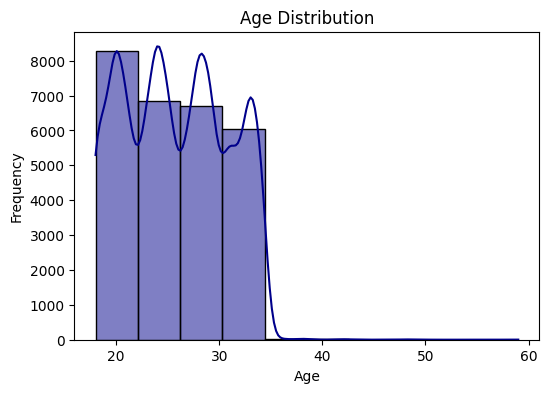

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=10, kde=True, color='darkblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Inference from the Plot:

Age Distribution
This histogram, combined with a Kernel Density Estimation (KDE) line, shows how ages are distributed in the dataset.

Observations:
Age Range:

Most individuals are between 18 and 35 years old.

Very few people are above 35 years, and almost none above 40.

Peaks in Frequency (KDE curve):

The KDE line shows multiple peaks, indicating several age groups with slightly higher frequencies (possibly due to age clustering around common values like 20, 25, 30).

Highest Frequency:

The most common ages fall in the 18–22 range, where the bar is highest (frequency ~8500).

Distribution Shape:

The distribution is right-skewed (tail extends to the right), meaning younger individuals dominate the dataset.

<ipython-input-176-a17769b8ff1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Duration', y='Age', data=df, palette='coolwarm')


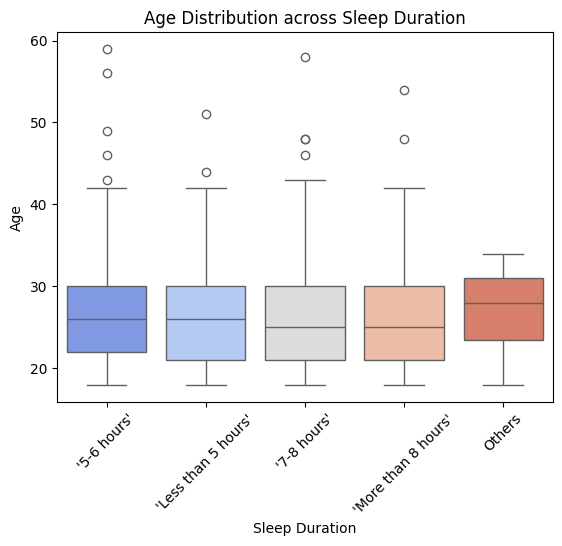

In [ ]:
sns.boxplot(x='Sleep Duration', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution across Sleep Duration")
plt.xticks(rotation=45)
plt.show()


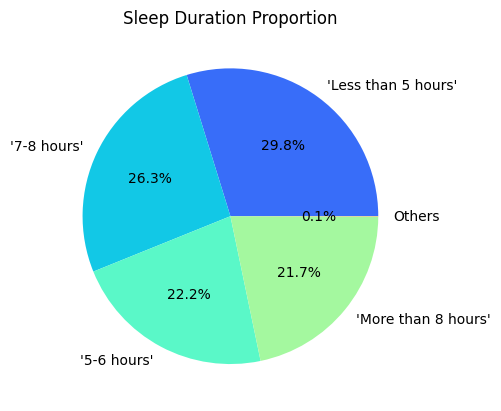

In [ ]:
sleep_counts = df['Sleep Duration'].value_counts()
plt.pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%', colors=sns.color_palette('rainbow'))
plt.title("Sleep Duration Proportion")
plt.show()


##  Academic Pressure

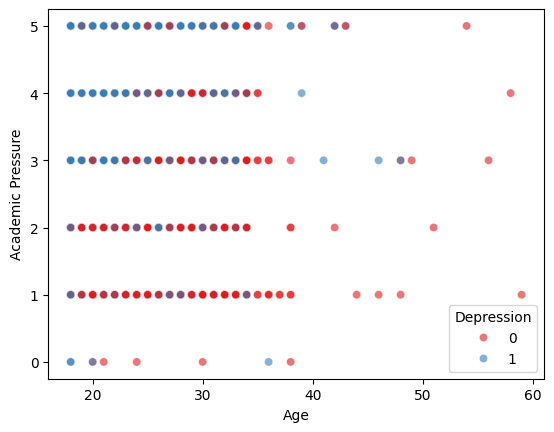

In [ ]:
sns.scatterplot(x='Age', y='Academic Pressure', hue='Depression', data=df, palette='Set1', alpha=0.6)
plt.show()

 inference

 Scatter Plot: Academic Pressure vs Age
Students with higher academic pressure tend to show more depression.

Pressure levels vary across all ages, mostly concentrated below age 30.

No strong correlation between age and pressure, but depression is higher at pressure levels 4–5.

## Work Pressure & CGPA

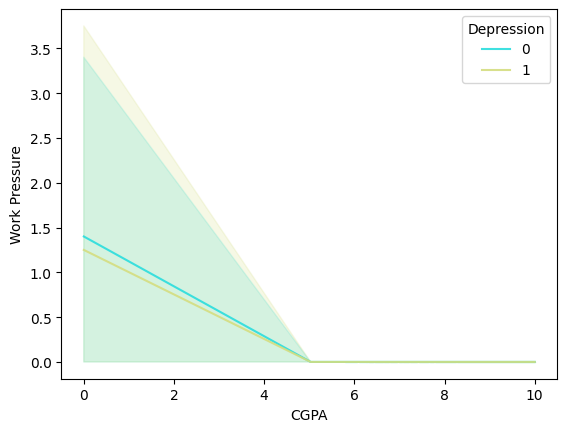

In [ ]:
sns.lineplot(x='CGPA', y='Work Pressure', hue='Depression', data=df, palette='rainbow',alpha=0.9)
plt.show()

 Inference



 CGPA vs Work Pressure
As CGPA increases, Work Pressure decreases for both depressed and non-depressed students.

Students with lower CGPA tend to experience higher work pressure.

Work pressure is slightly higher for depressed students at lower CGPA levels.

<ipython-input-180-4a4503c3d225>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Work/Study Hours'],palette='rainbow',edgecolor='k')


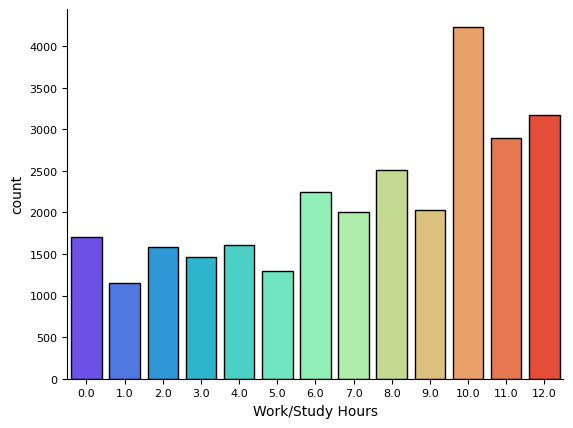

In [ ]:
sns.countplot(x=df['Work/Study Hours'],palette='rainbow',edgecolor='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=8)
plt.xticks(fontsize=8)
sns.despine(top=True,right=True)
plt.show()

Inference

Work/Study Hours Distribution
A significant number of students work/study for 10 to 12 hours daily, with 10 hours being the most common duration.

A smaller group of students works/studies 0 to 5 hours, indicating varied study patterns.

There is a gradual increase in the number of students as study hours increase from 6 to 10 hours.

Peak workload is seen at 10 hours, after which there is a slight drop at 11 and 12 hours

## Financial Stress

<ipython-input-181-9361e7d61b2b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Financial Stress'], palette='rainbow', edgecolor='k')


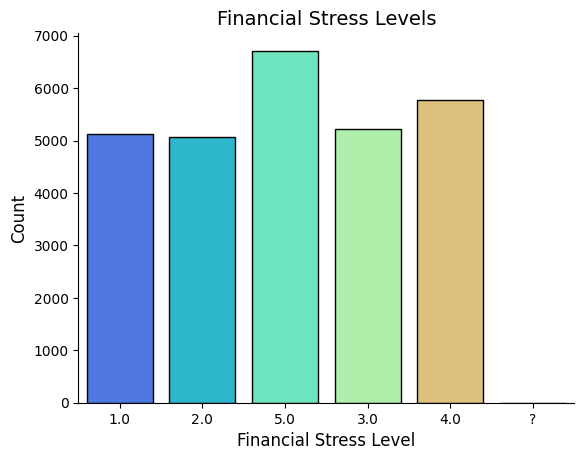

In [ ]:
sns.countplot(x=df['Financial Stress'], palette='rainbow', edgecolor='k')
plt.title("Financial Stress Levels", fontsize=14)
plt.xlabel("Financial Stress Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.show()

Inference:


Financial Stress Levels
The majority of students experience moderate to high levels of financial stress.

The highest count is observed around the middle stress levels, suggesting that financial stress is a common issue among students.

Financial stress could be a significant contributing factor to student well-being, possibly influencing academic performance and mental health (e.g., depression).

 ## Have you ever had suicidal thoughts ?

<ipython-input-182-ff0b9b487e01>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Have you ever had suicidal thoughts ?', y='CGPA', data=df, palette='rainbow')


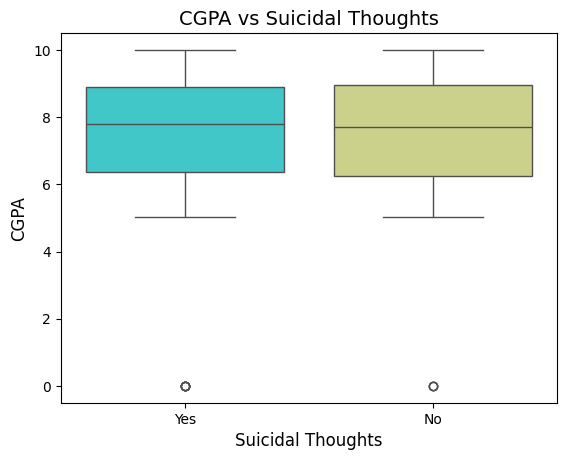

In [ ]:
sns.boxplot(x='Have you ever had suicidal thoughts ?', y='CGPA', data=df, palette='rainbow')
plt.title("CGPA vs Suicidal Thoughts", fontsize=14)
plt.xlabel("Suicidal Thoughts", fontsize=12)
plt.ylabel("CGPA", fontsize=12)
plt.show()

inference  

from the Box Plot (CGPA vs Suicidal Thoughts):
The median CGPA is almost the same for students who had suicidal thoughts ("Yes") and those who didn't ("No").

Both groups have similar CGPA ranges (Interquartile Range - IQR), showing no significant difference.

Outliers with very low CGPA (~0) exist in both groups.

This suggests that CGPA may not be a strong indicator of suicidal thoughts.

## Degree

<ipython-input-183-bfe6c9d3b2ac>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=df['Degree'],palette='rainbow',edgecolor='k')


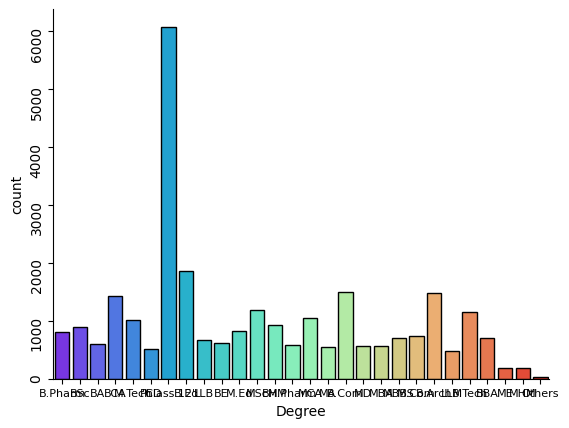

In [ ]:
cp=sns.countplot(x=df['Degree'],palette='rainbow',edgecolor='k')
plt.xticks(fontsize=14)
plt.yticks(rotation=90)
plt.xticks(fontsize=8)
sns.despine(top=True,right=True)

## Dietary Habits


<ipython-input-184-3692f05dcd48>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Dietary Habits'], palette='rainbow', edgecolor='k')


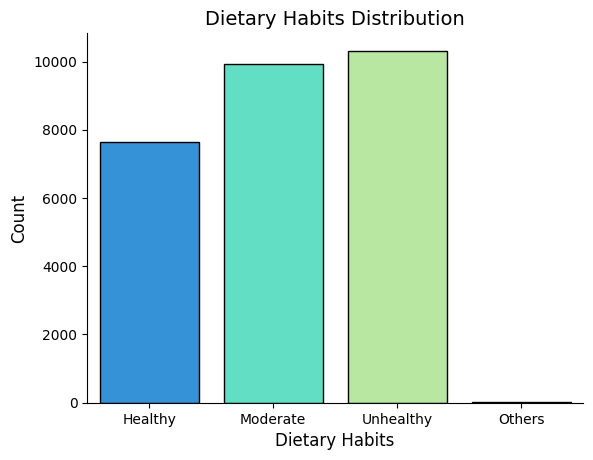

In [ ]:
sns.countplot(x=df['Dietary Habits'], palette='rainbow', edgecolor='k')
plt.title("Dietary Habits Distribution", fontsize=14)
plt.xlabel("Dietary Habits", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.show()


## Family History of Mental Illness

<ipython-input-185-0d667ddcb99d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Family History of Mental Illness'], palette='rainbow', edgecolor='k')


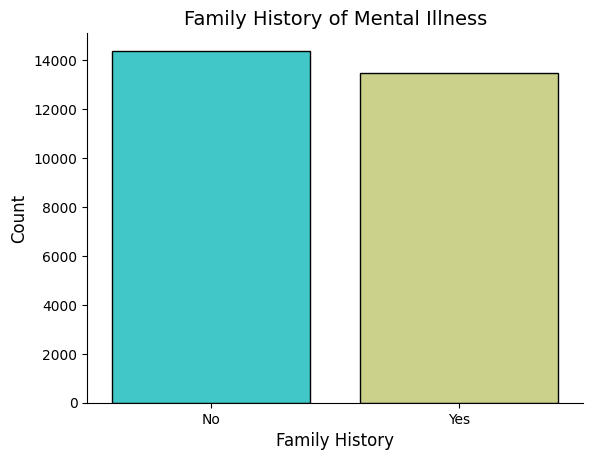

In [ ]:
sns.countplot(x=df['Family History of Mental Illness'], palette='rainbow', edgecolor='k')
plt.title("Family History of Mental Illness", fontsize=14)
plt.xlabel("Family History", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(top=True, right=True)
plt.show()


## Job Satisfaction   

<ipython-input-186-47b789d638ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Job Satisfaction'], palette='rainbow', edgecolor='k')


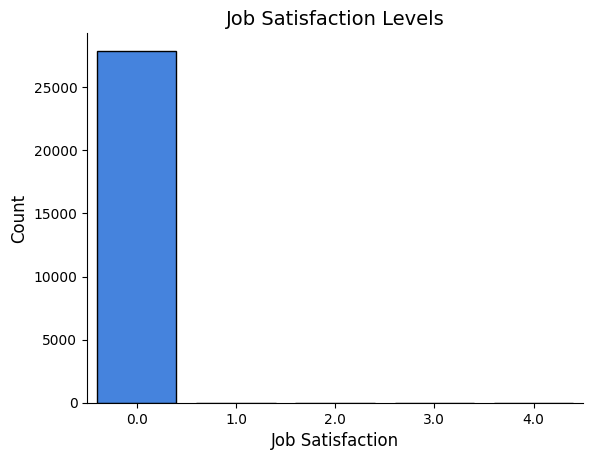

In [ ]:
sns.countplot(x=df['Job Satisfaction'], palette='rainbow', edgecolor='k')

plt.title("Job Satisfaction Levels", fontsize=14)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.despine(top=True, right=True)
plt.show()


# Data Cleaning

## Missing values

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


no null values

## Duplicates

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
27896,False
27897,False
27898,False
27899,False


## Encoding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

### Ordinal Encoding

In [4]:
df['Degree'].nunique()

28

In [5]:
df['Degree'].unique()


array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [6]:
education_map = {
    'Others': 0,
    "'Class 12'": 1,

    # UG Degrees
    'BA': 2, 'BSc': 2, 'B.Com': 2, 'BBA': 2, 'BCA': 2, 'B.Pharm': 2, 'B.Ed': 2, 'BHM': 2,
    'LLB': 2, 'B.Tech': 2, 'BE': 2, 'B.Arch': 2,

    # PG Degrees
    'M.Tech': 3, 'MSc': 3, 'MA': 3, 'M.Com': 3, 'MBA': 3, 'M.Ed': 3, 'MCA': 3,
    'M.Pharm': 3, 'ME': 3, 'MHM': 3, 'LLM': 3,

    # Doctoral / Professional
    'PhD': 4, 'MD': 4, 'MBBS': 4
}

df['Degree'] = df['Degree'].map(education_map)

df['Degree'].unique()

array([2, 3, 4, 1, 0])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [8]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,2,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,2,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,2,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,2,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,3,Yes,1.0,1.0,No,0


In [9]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [10]:
df['Sleep Duration']=df['Sleep Duration'].map({"Others":-1,"'Less than 5 hours'":0,"'5-6 hours'":1,"'7-8 hours'":2,"'More than 8 hours'":3})

In [11]:
df['Dietary Habits']=df['Dietary Habits'].map({"Others":-1,"Unhealthy":0,"Healthy":1,"Moderate":2})

In [12]:
df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].map({"Yes":0,"No":1})

In [13]:
df['Family History of Mental Illness']=df['Family History of Mental Illness'].map({"Yes":0,"No":1})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

In [15]:
df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [16]:
df.loc[df['Financial Stress']=="?",'Financial Stress']='0'

In [17]:
df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '0'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

### Label Encoding (For Binary/Ordinal Categories)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode (categorical columns)
categorical_cols = ['Gender', 'Depression','Have you ever had suicidal thoughts ?',
                    'Dietary Habits', 'Family History of Mental Illness', 'Job Satisfaction','City','Sleep Duration','Profession','Financial Stress','Degree']

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  int64  
 4   Profession                             27901 non-null  int64  
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27901 non-null  int64  
 11  Di

# Data Transformation

## outliers

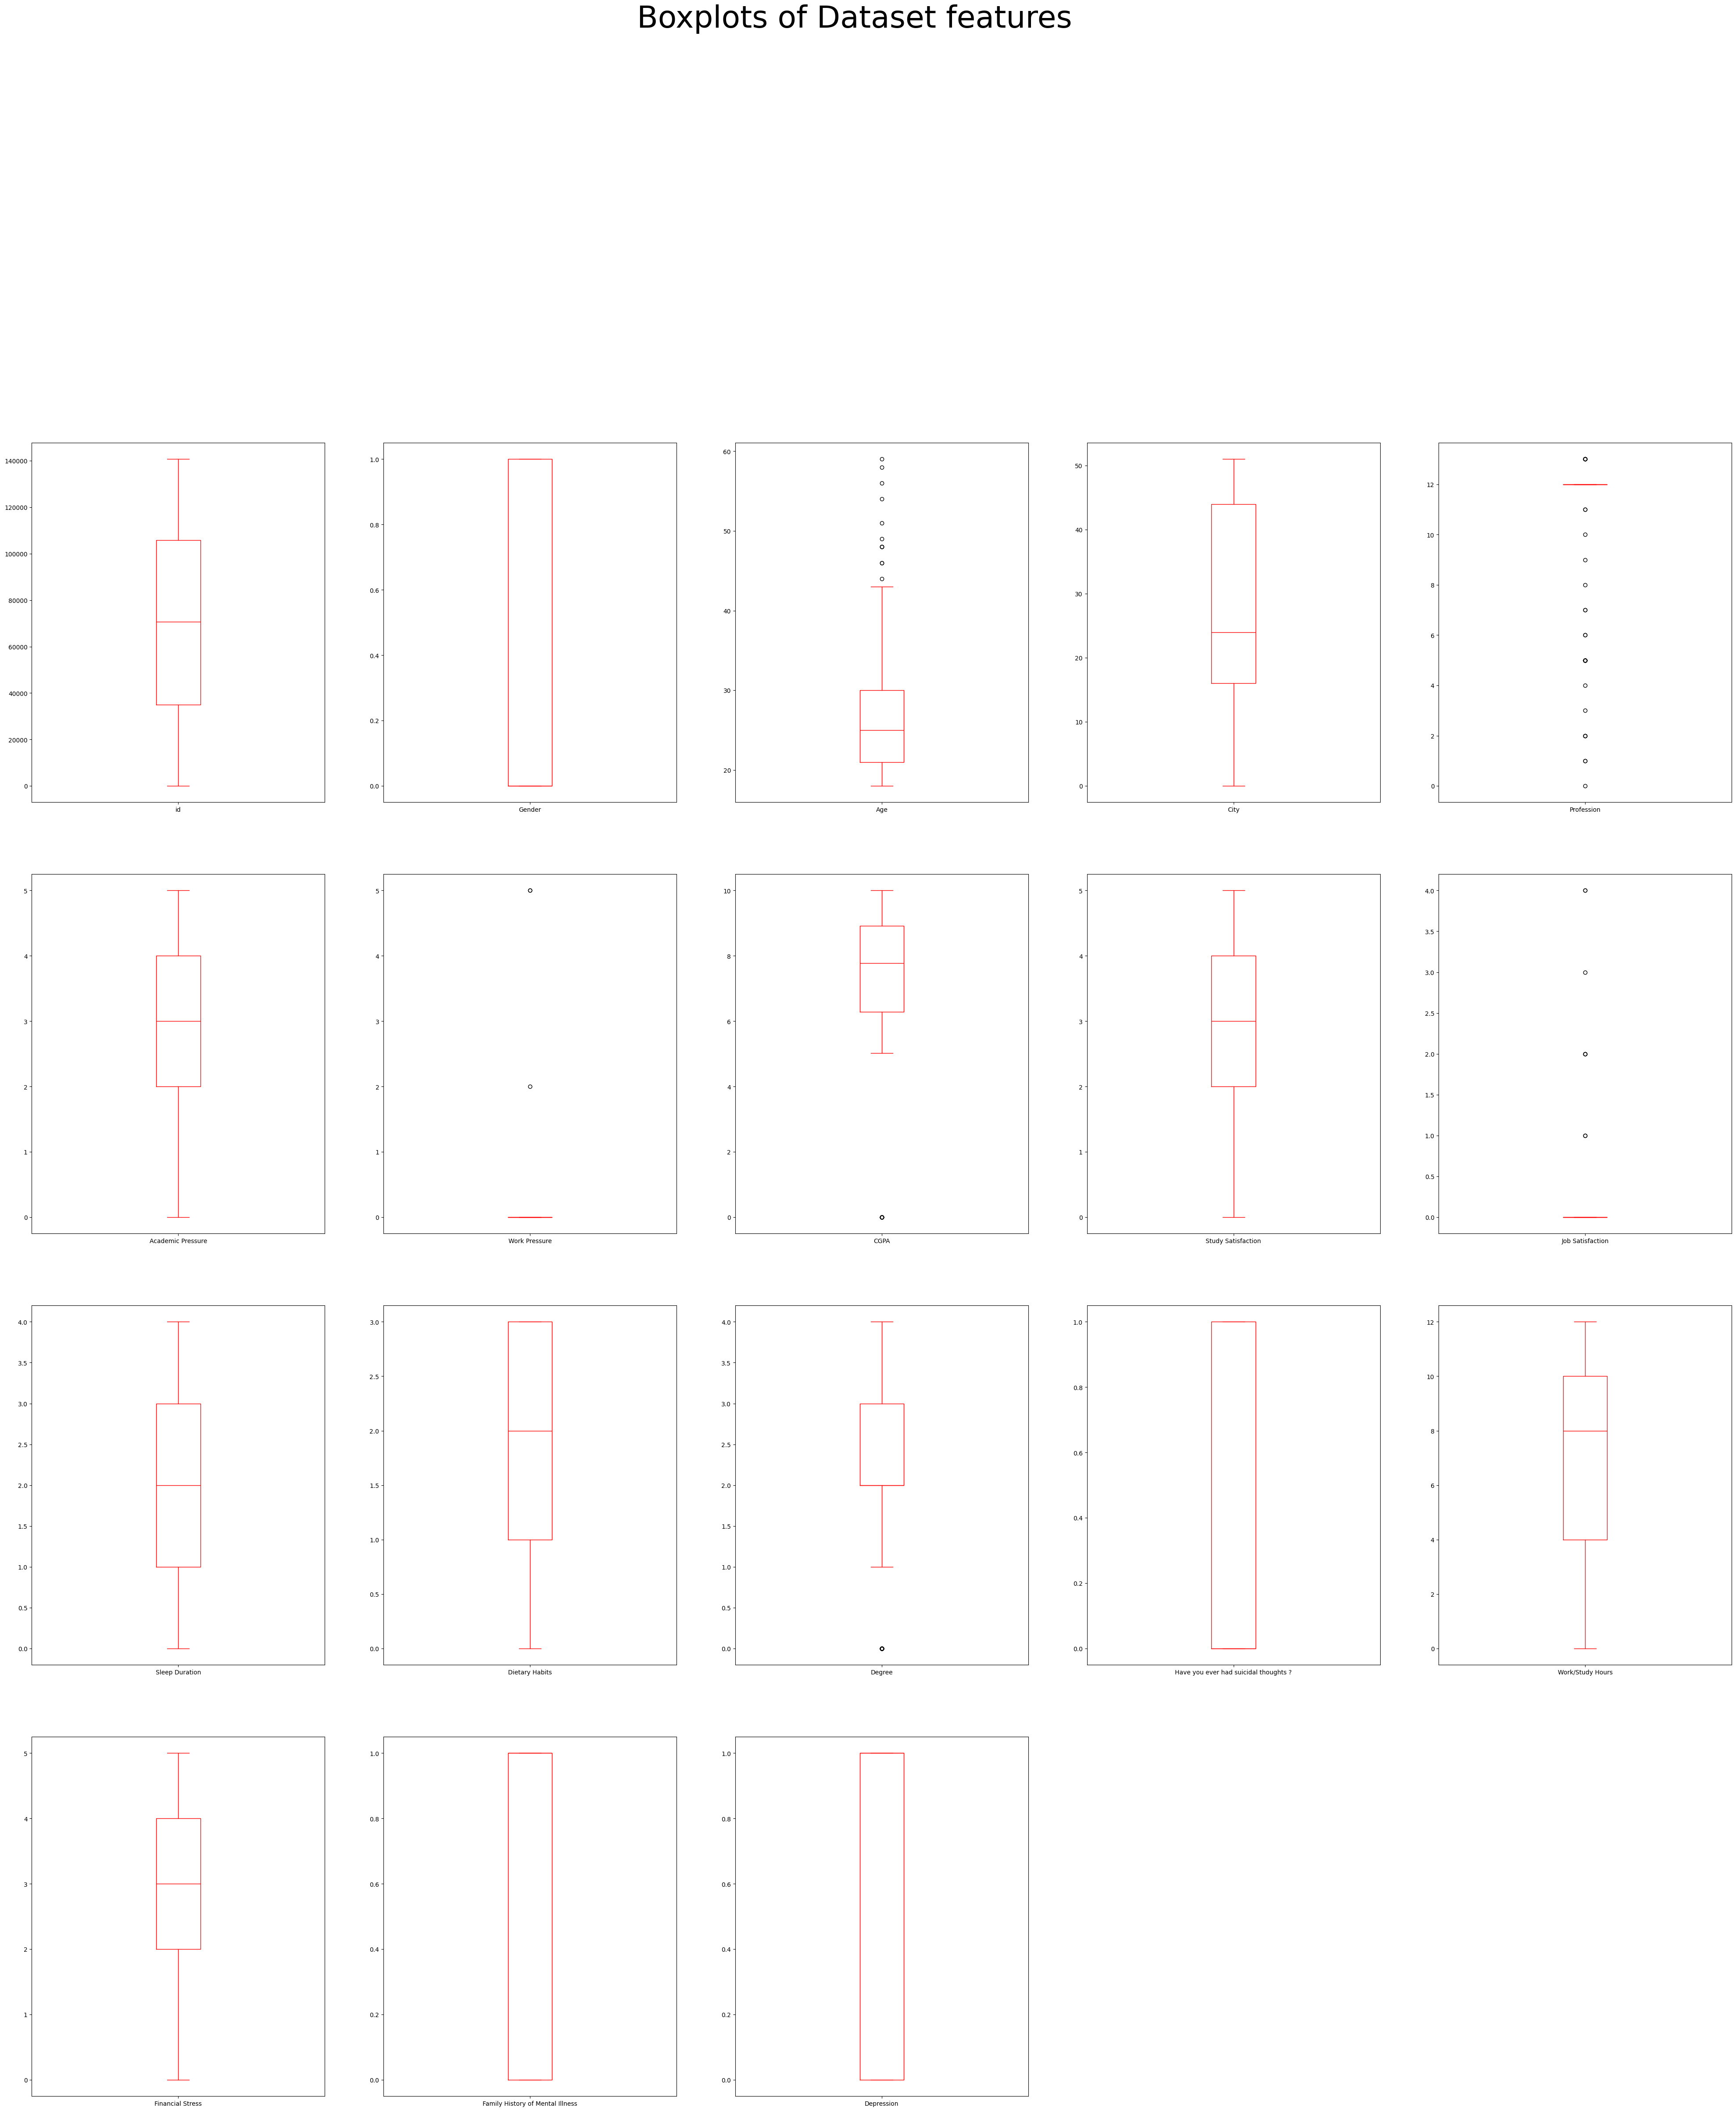

In [ ]:
df.plot(kind='box',subplots=True, layout=(8,5),figsize=(50,100),color='red')
plt.suptitle('Boxplots of Dataset features',fontsize=50)
plt.show()

In [21]:
df_copy = df.copy()
def remove_outliers_iqr(df, exclude_columns):
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR= Q3-Q1

    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5* IQR

    df = df[(df[column]>= lower_bound) & (df[column]<=upper_bound)]

  return df

exclude_columns = ['Depression']


df= remove_outliers_iqr(df, exclude_columns)

print('shape of data before removing outliears:',df_copy.shape)
print('shape of data after removing outliers:',df.shape)
print('Number of outliers removing:',df_copy.shape[0]-df.shape[0])

shape of data before removing outliears: (27901, 18)
shape of data after removing outliers: (27812, 18)
Number of outliers removing: 89


## skewness

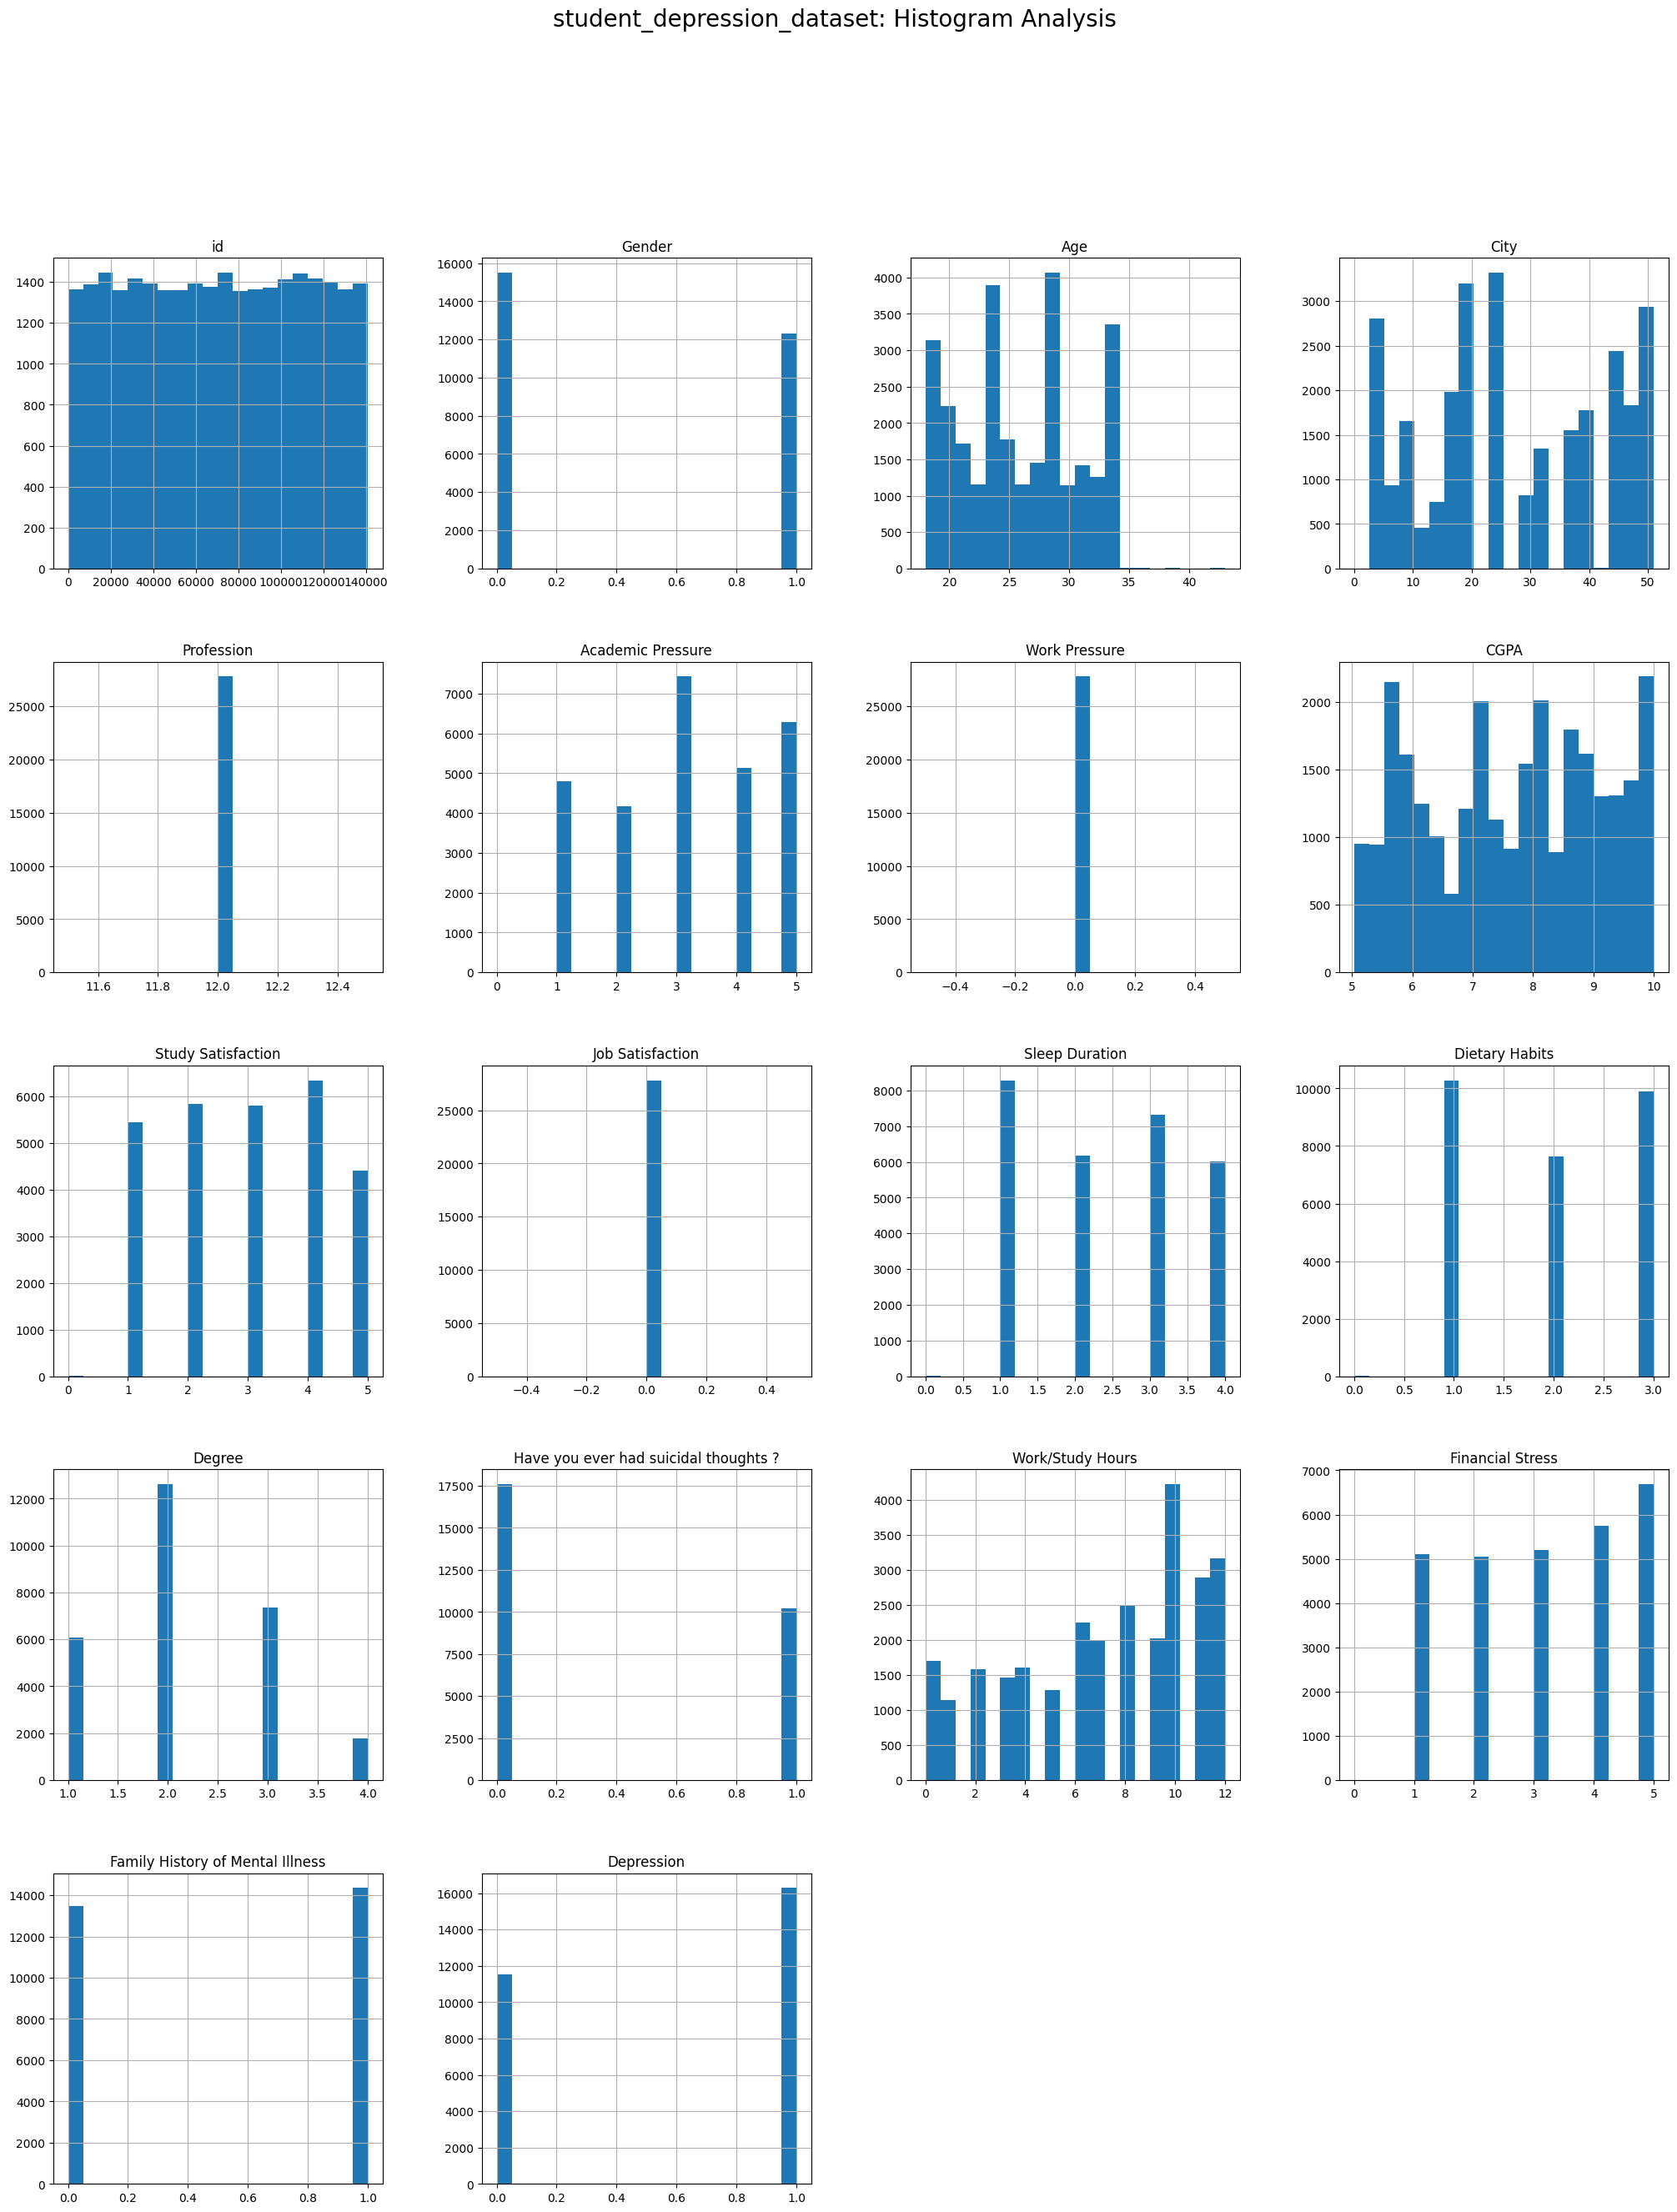

In [ ]:
df.hist(bins=20, figsize=(25,30))
plt.suptitle('student_depression_dataset: Histogram Analysis',fontsize=20)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27812 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27812 non-null  int64  
 1   Gender                                 27812 non-null  int64  
 2   Age                                    27812 non-null  float64
 3   City                                   27812 non-null  int64  
 4   Profession                             27812 non-null  int64  
 5   Academic Pressure                      27812 non-null  float64
 6   Work Pressure                          27812 non-null  float64
 7   CGPA                                   27812 non-null  float64
 8   Study Satisfaction                     27812 non-null  float64
 9   Job Satisfaction                       27812 non-null  int64  
 10  Sleep Duration                         27812 non-null  int64  
 11  Dietary

In [ ]:
# calculate skewness for each colum
skewness=df.skew()
#sort the skewness values in ascending order
sorted_skewness=skewness.sort_values(ascending=True)
#Display the sorted skewness values
print(sorted_skewness)

Work/Study Hours                        -0.456803
Depression                              -0.346541
Academic Pressure                       -0.134338
Financial Stress                        -0.129376
CGPA                                    -0.073678
Family History of Mental Illness        -0.064181
id                                      -0.005606
Job Satisfaction                         0.000000
Work Pressure                            0.000000
Profession                               0.000000
Study Satisfaction                       0.011941
Dietary Habits                           0.024120
City                                     0.042570
Age                                      0.078663
Sleep Duration                           0.079505
Gender                                   0.230494
Degree                                   0.307813
Have you ever had suicidal thoughts ?    0.550950
dtype: float64


In [22]:
# step 1:Select numeric columns, excluding 'Depression'
numeric_columns=df.drop(columns=['Depression']).select_dtypes(include=['number'])

skewness = numeric_columns.skew()

highly_skewed_columns=skewness[abs(skewness)>1].index

for col in highly_skewed_columns:
  df[col] = np.log1p(df[col])
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,0,33.0,51,12,5.0,0.0,8.97,2.0,0,2,2,2,0,3.0,1,1,1
1,8,1,24.0,5,12,2.0,0.0,5.90,5.0,0,2,3,2,1,3.0,2,0,0
2,26,0,31.0,44,12,3.0,0.0,7.03,5.0,0,1,2,2,1,9.0,1,0,0
3,30,1,28.0,49,12,3.0,0.0,5.59,2.0,0,3,3,2,0,4.0,5,0,1
4,32,1,25.0,18,12,4.0,0.0,8.13,3.0,0,2,3,3,0,1.0,1,1,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/19vDRf93A0KSj9t9SdeTY_k6m4eTm4E4SfPGziYj8crw/edit#gid=0


## Removing unwanted features

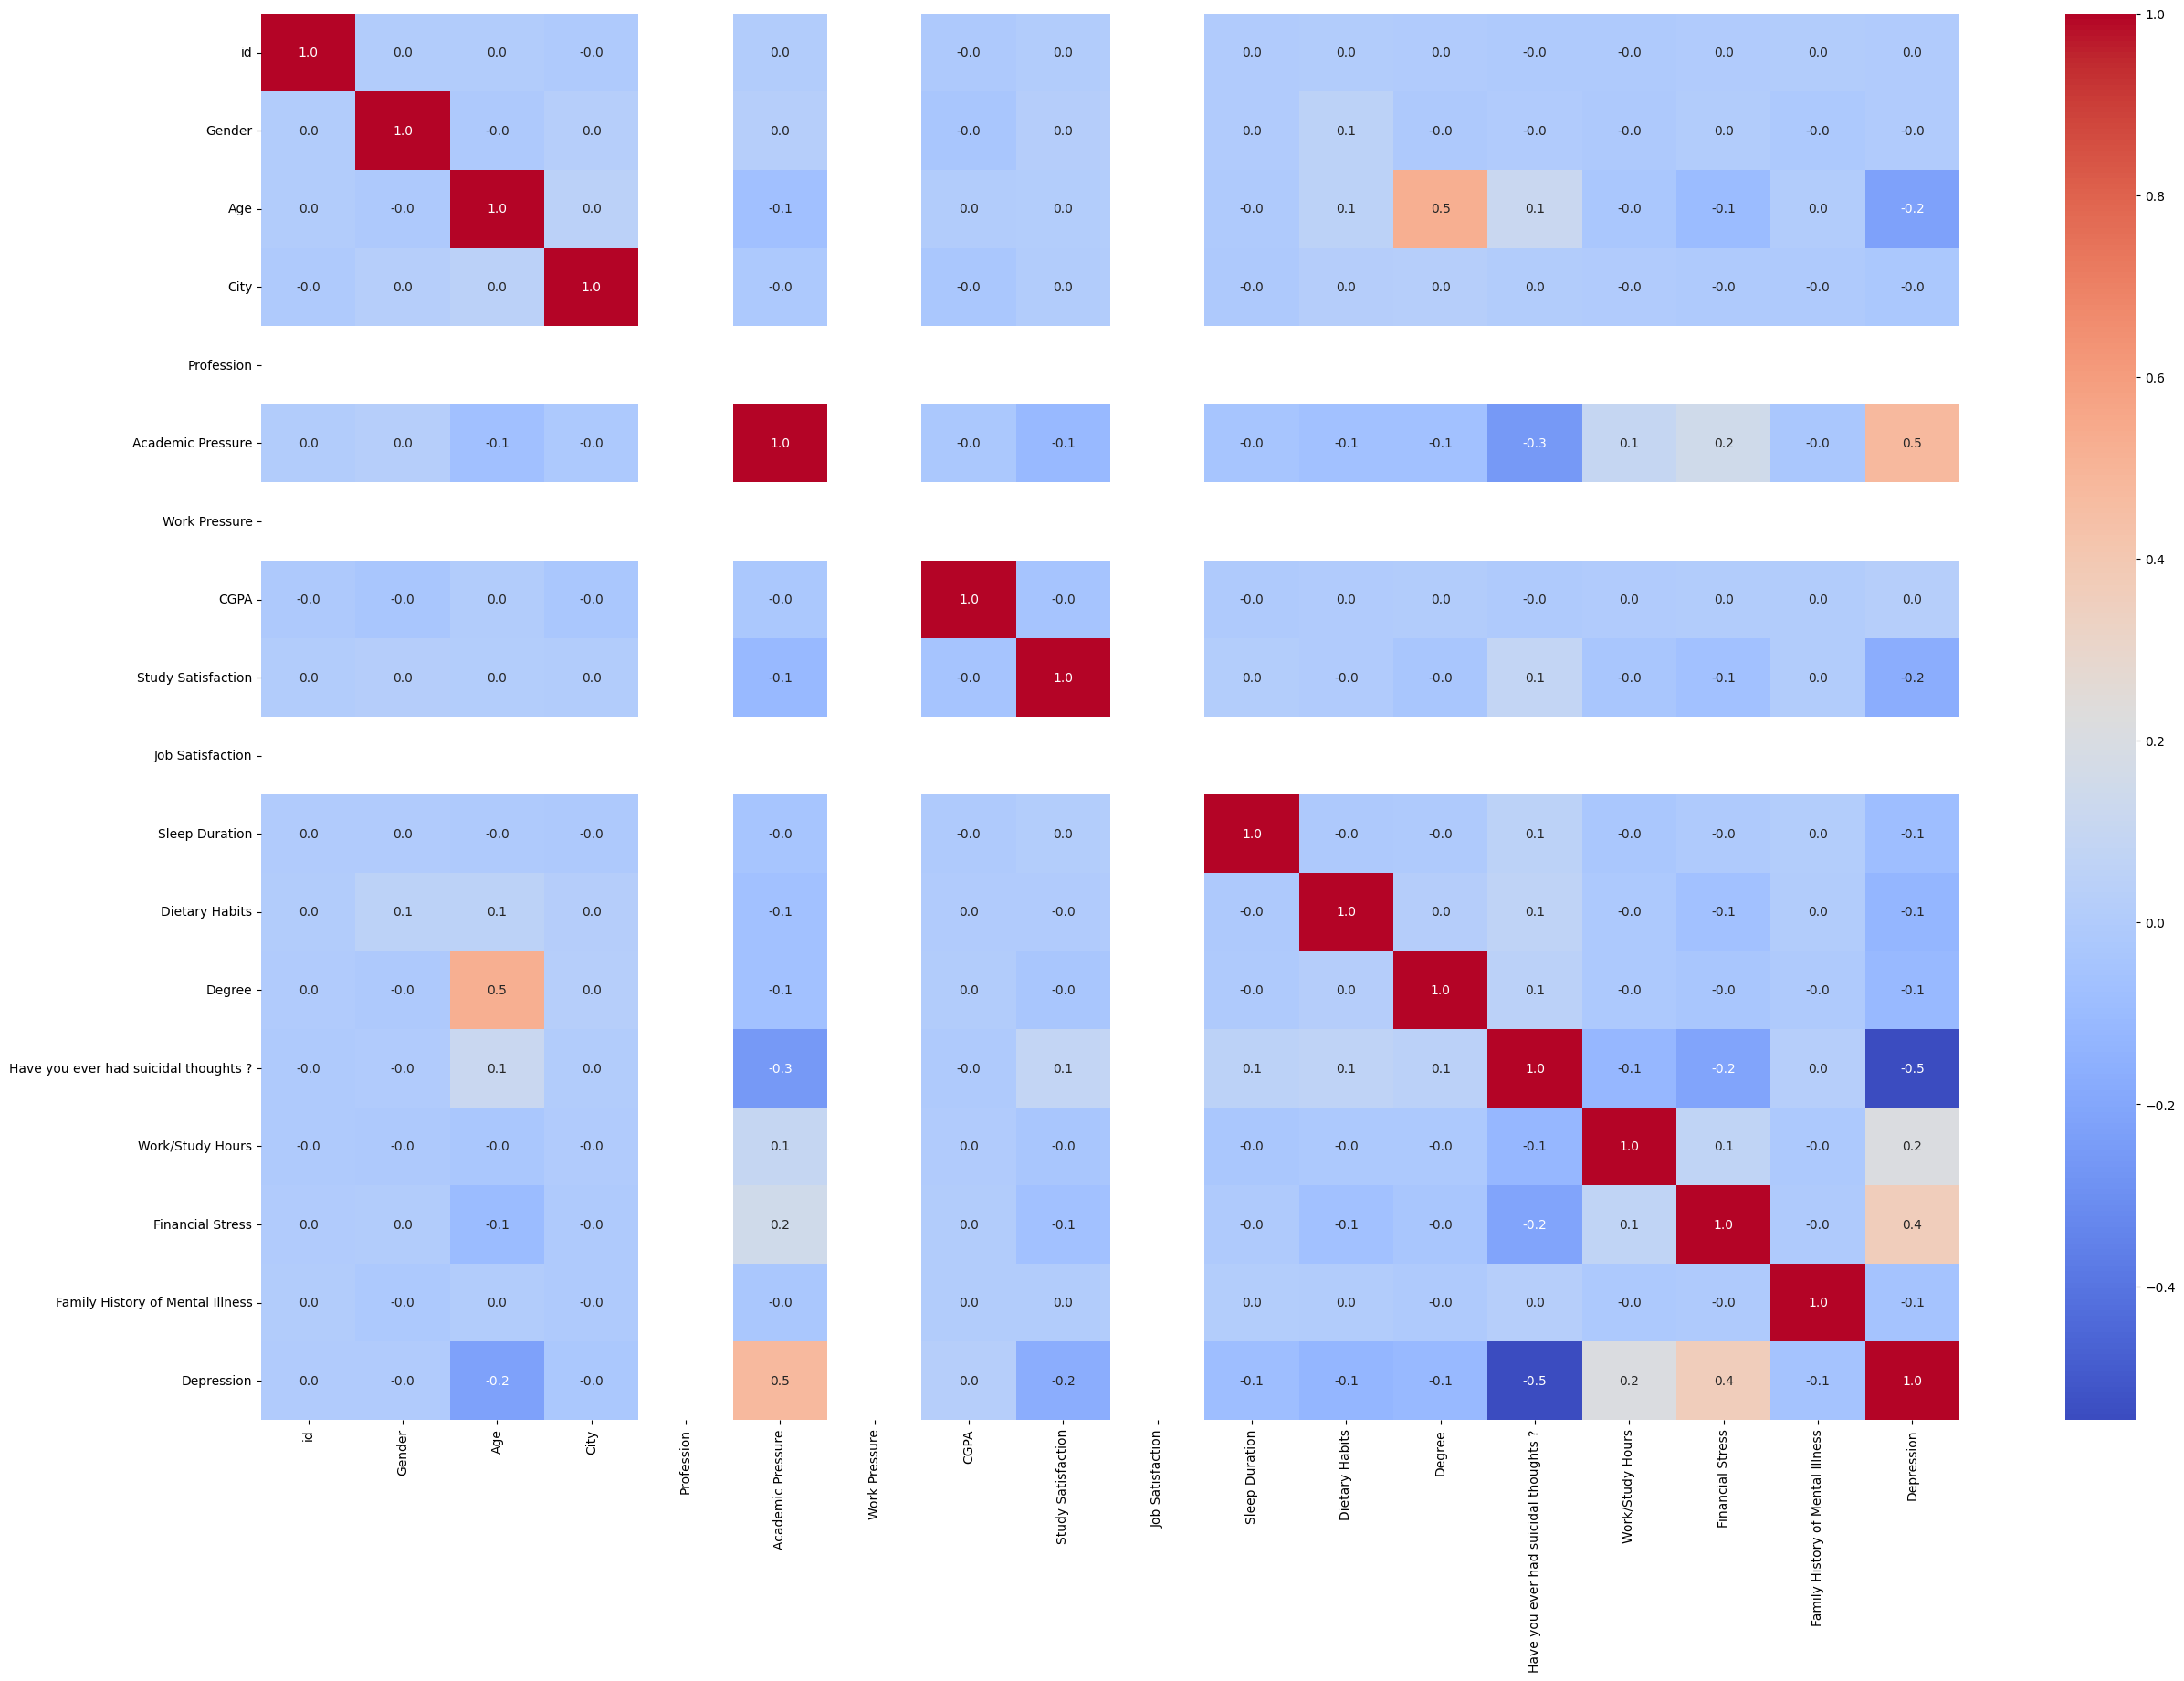

In [27]:
plt.figure(figsize=((30,20)))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)
plt.show()

In [32]:
df['Work Pressure'].value_counts()

,count
Work Pressure,
0.0,27812


In [33]:
df['Profession'].value_counts()

,count
Profession,
12,27812


In [34]:
df['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
0,27812


In [23]:
df.drop(['Work Pressure','Profession','Job Satisfaction'],axis=1,inplace=True)

### Using correlation

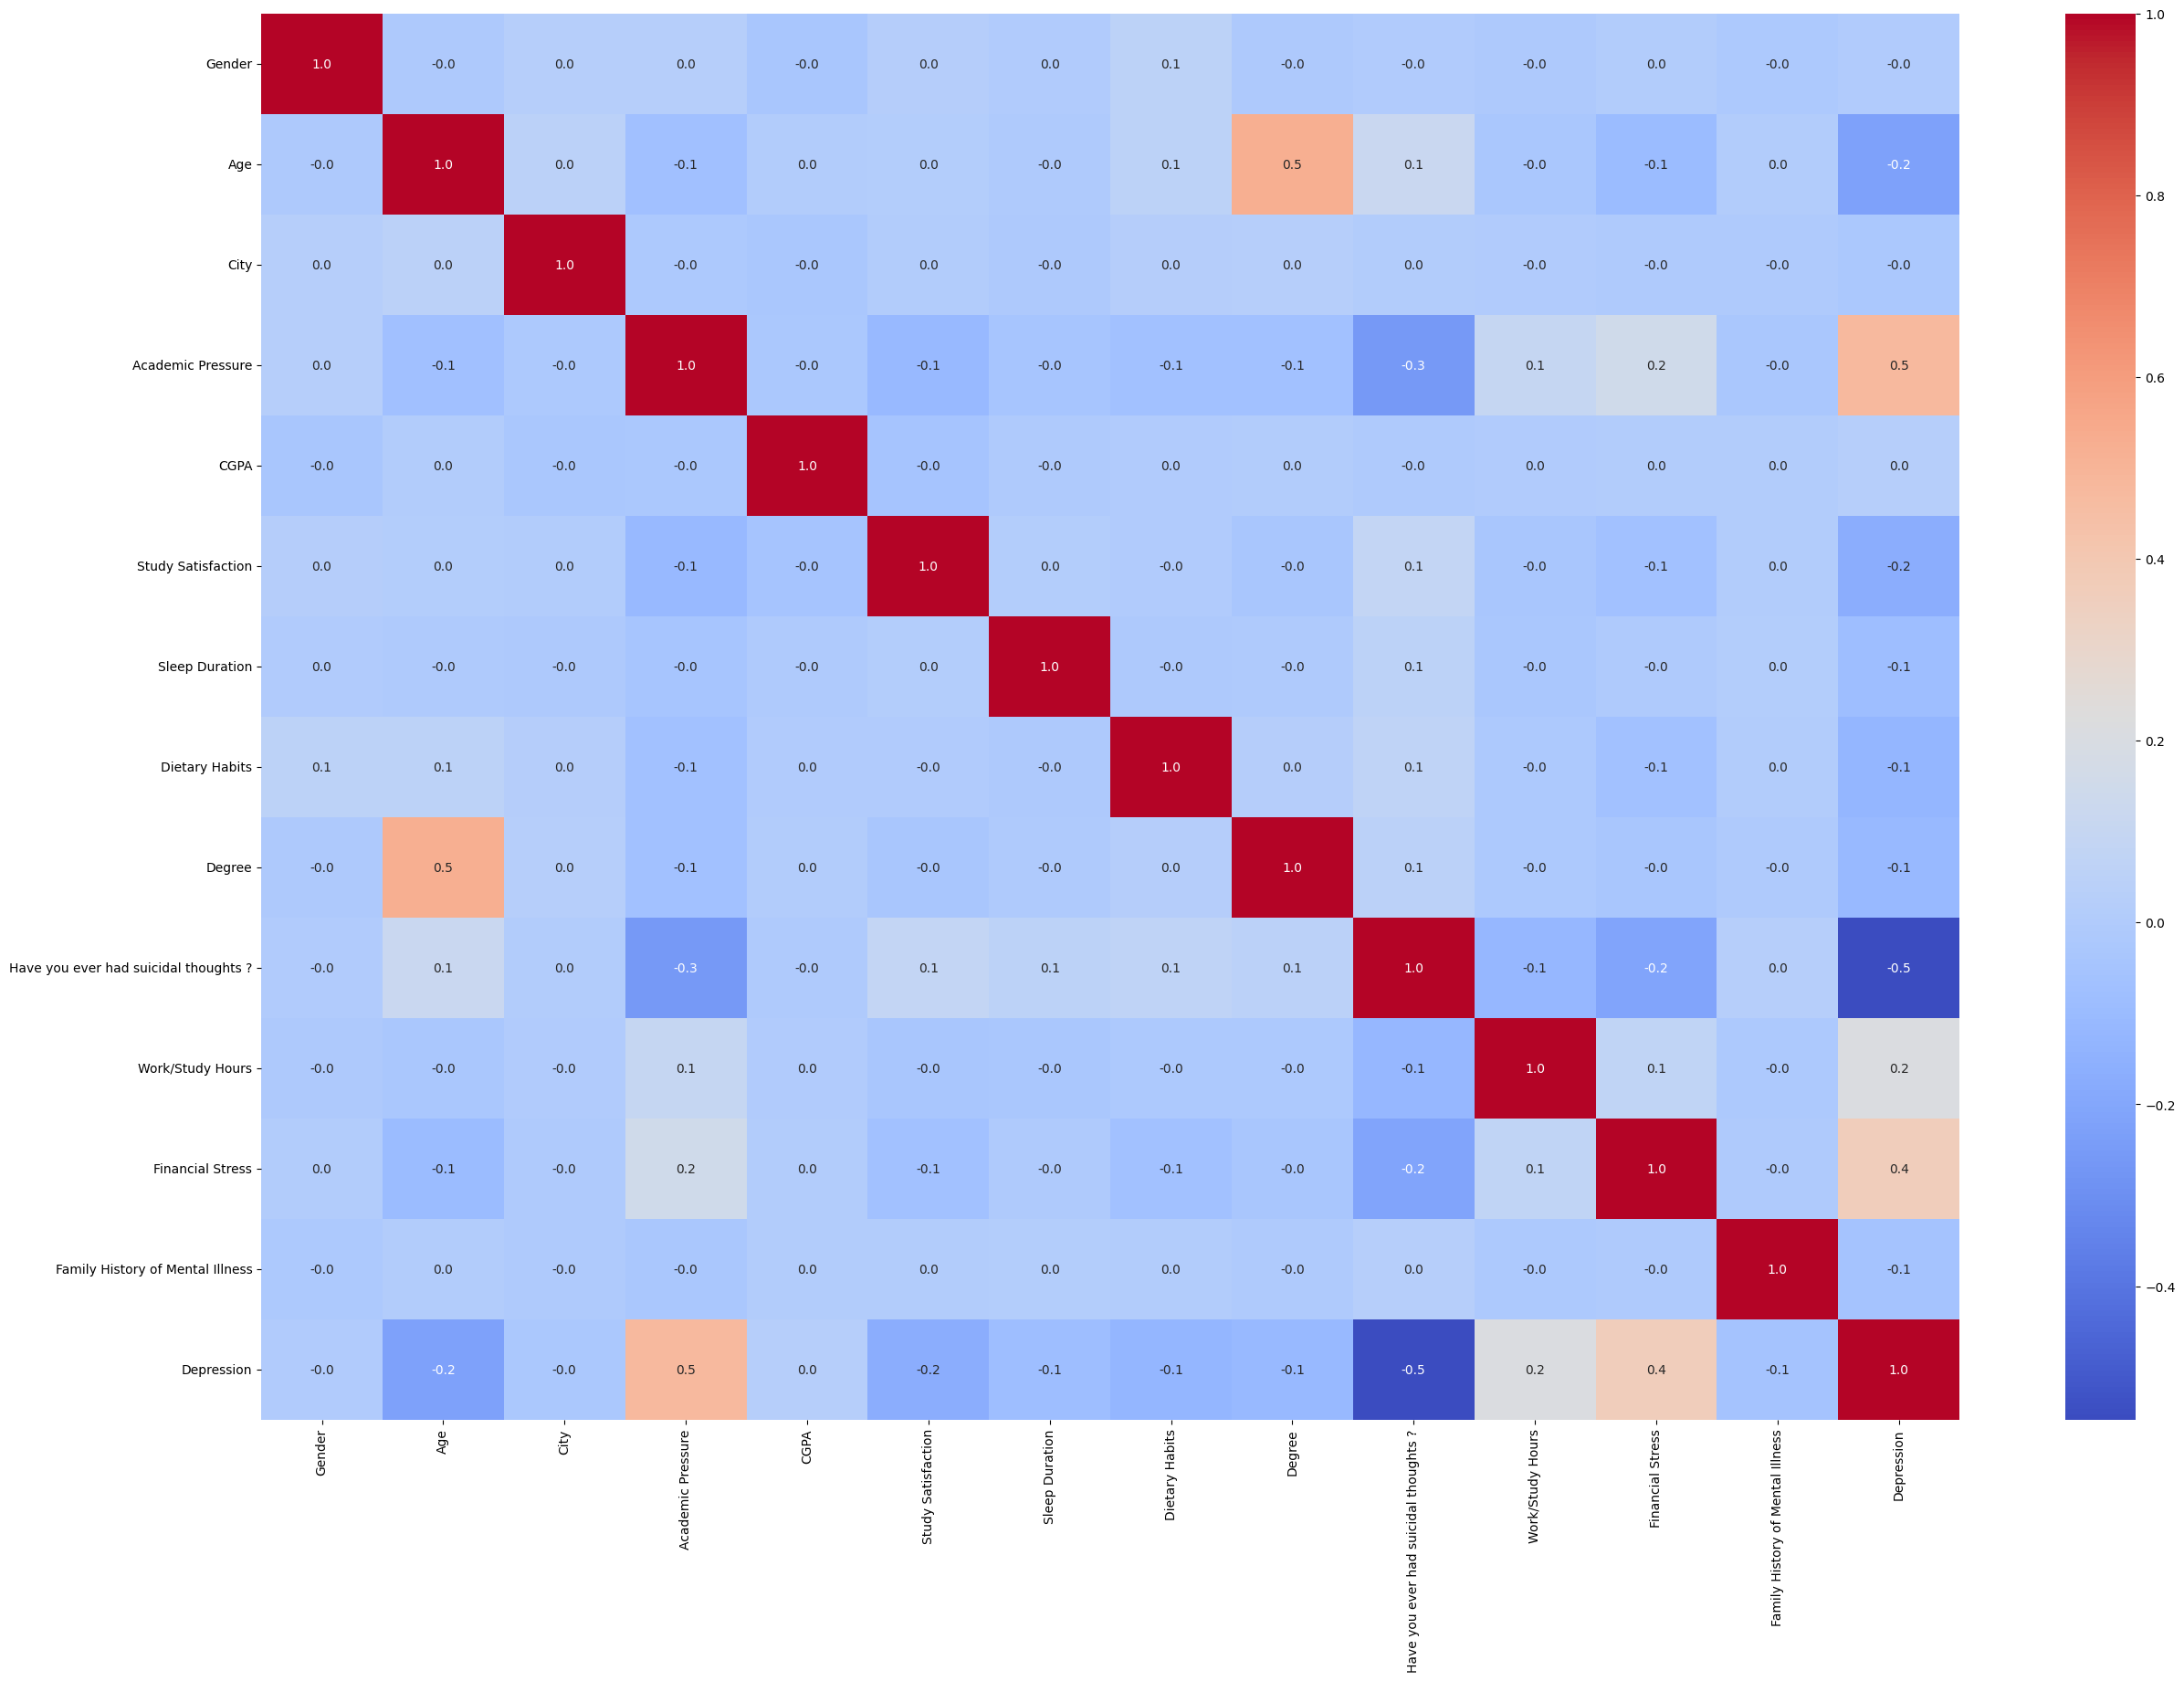

In [37]:
plt.figure(figsize=((30,20)))
corr=df.corr(numeric_only=True,method='pearson')
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)
plt.show()

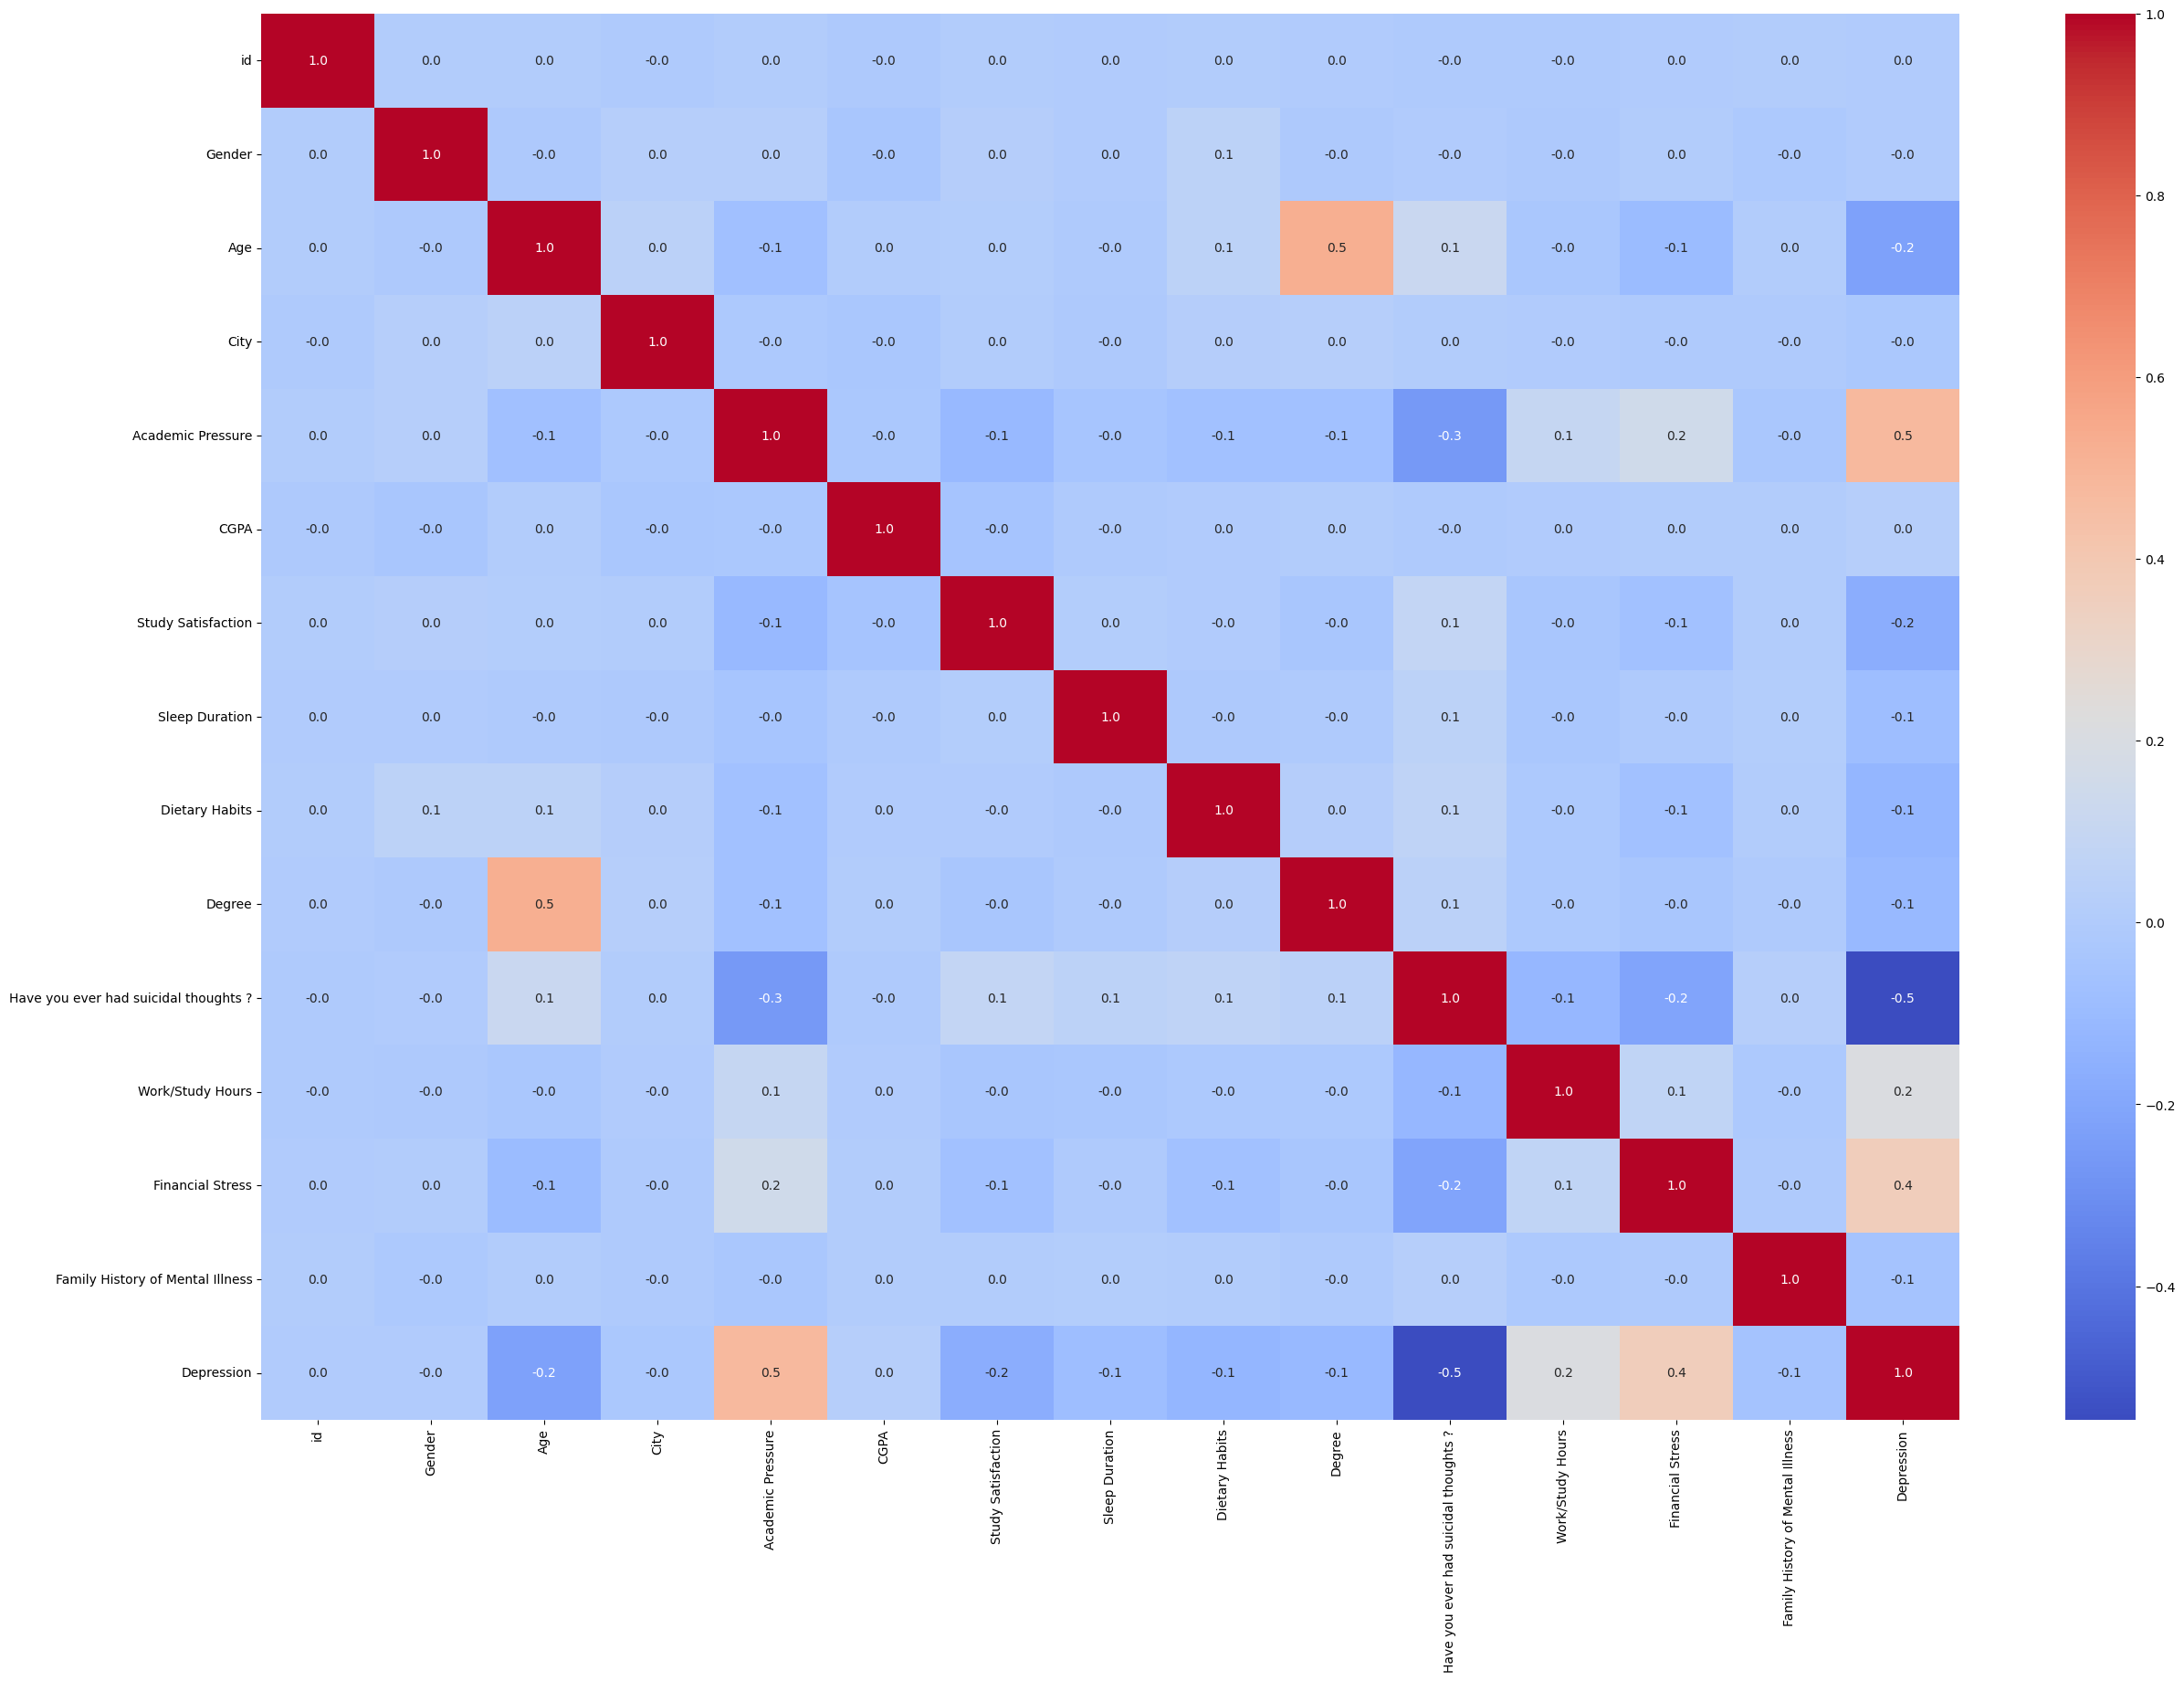

In [ ]:
plt.figure(figsize=((30,20)))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='0.01f',annot_kws=None)
plt.show()

In [24]:
df=df.drop(["id"],axis=1)

In [25]:
df=df.drop(["Gender"],axis=1)

In [26]:
df=df.drop(["Degree"],axis=1)

In [27]:
df=df.drop(["CGPA"],axis=1)

In [28]:
df=df.drop(["City"],axis=1)

In [29]:
df=df.drop(["Dietary Habits"],axis=1)

In [30]:
df=df.drop(["Family History of Mental Illness"],axis=1)

In [31]:
#df=df.drop(["Age"],axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27812 entries, 0 to 27900
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    27812 non-null  float64
 1   Academic Pressure                      27812 non-null  float64
 2   Study Satisfaction                     27812 non-null  float64
 3   Sleep Duration                         27812 non-null  int64  
 4   Have you ever had suicidal thoughts ?  27812 non-null  int64  
 5   Work/Study Hours                       27812 non-null  float64
 6   Financial Stress                       27812 non-null  int64  
 7   Depression                             27812 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.9 MB


In [33]:
correlation_matrix = df.corr()
#set the correlation threshold
threshold=0.5
#Find pairs of Feature with high correlation
highly_correlated_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # check if the absoulte correlation exceeds the threshold
    if abs(correlation_matrix.iloc[i,j])>threshold:
      highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
      #print all the pairs of highly correlated feature
print(highly_correlated_pairs)

[('Depression', 'Have you ever had suicidal thoughts ?')]


# Model building

In [34]:
x= df.drop(['Depression'],axis=1)
y=df['Depression']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('shape of training feautures:',x_train.shape)
print('shape of training feautures:',y_train.shape)
print('shape of training target:',x_train.shape)
print('shape of training target:',y_train.shape)

shape of training feautures: (22249, 7)
shape of training feautures: (22249,)
shape of training target: (22249, 7)
shape of training target: (22249,)


# logistics regression model

In [36]:
# initializing logistic regression model
logreg=LogisticRegression()
#train the model
logreg.fit(x_train, y_train)
#predictions
y_pred=logreg.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.4f}')

Accuracy:0.8388


<Axes: >

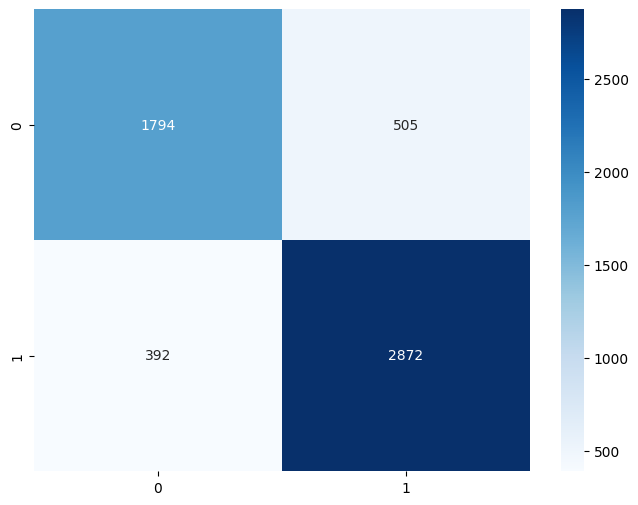

In [38]:
# confussion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)


#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')

## Best Classfication Model

Training and Evaluating Logistic Regression...
Accuracy:0.8388

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2299
           1       0.85      0.88      0.86      3264

    accuracy                           0.84      5563
   macro avg       0.84      0.83      0.83      5563
weighted avg       0.84      0.84      0.84      5563



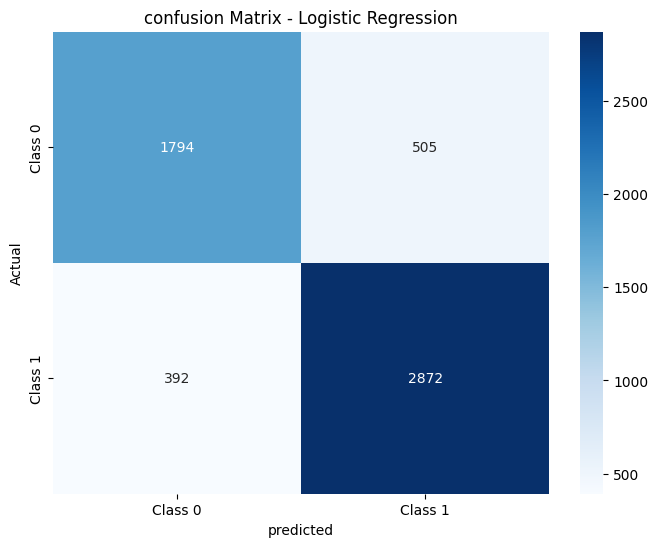

--------------------------------------------------------------------------------
Training and Evaluating Random Forest...
Accuracy:0.8166

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      2299
           1       0.83      0.86      0.85      3264

    accuracy                           0.82      5563
   macro avg       0.81      0.81      0.81      5563
weighted avg       0.82      0.82      0.82      5563



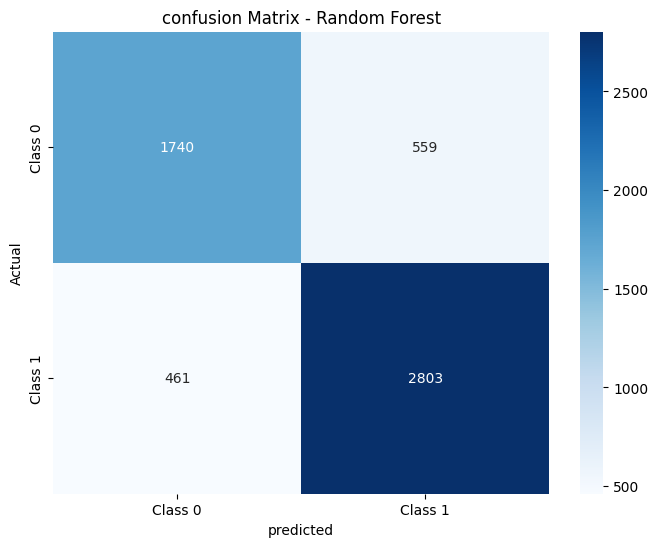

--------------------------------------------------------------------------------
Training and Evaluating Decision Tree...
Accuracy:0.7652

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2299
           1       0.80      0.79      0.80      3264

    accuracy                           0.77      5563
   macro avg       0.76      0.76      0.76      5563
weighted avg       0.77      0.77      0.77      5563



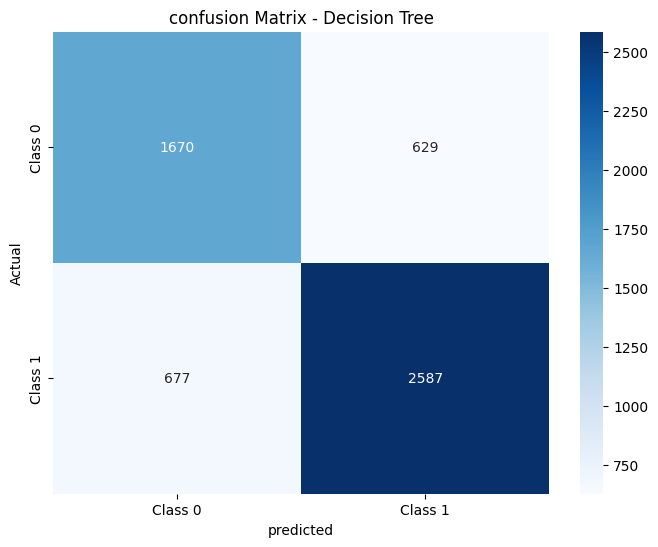

--------------------------------------------------------------------------------
Training and Evaluating K-Nearest Neighbors...
Accuracy:0.8179

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      2299
           1       0.82      0.88      0.85      3264

    accuracy                           0.82      5563
   macro avg       0.82      0.80      0.81      5563
weighted avg       0.82      0.82      0.82      5563



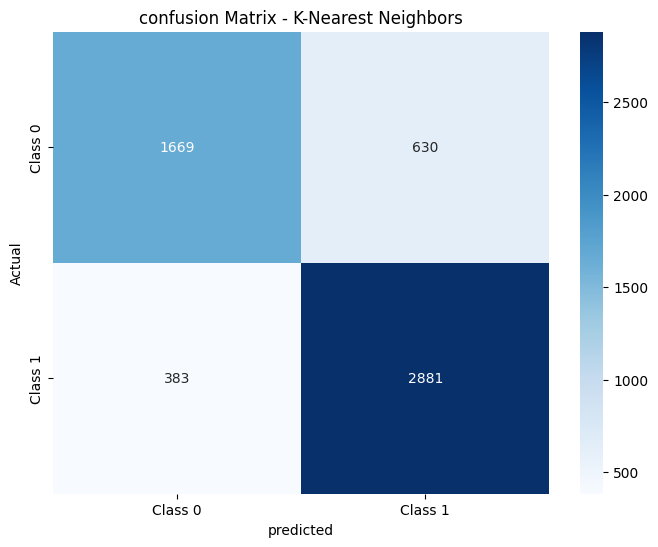

--------------------------------------------------------------------------------
Training and Evaluating Extra Trees...
Accuracy:0.8098

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      2299
           1       0.83      0.85      0.84      3264

    accuracy                           0.81      5563
   macro avg       0.80      0.80      0.80      5563
weighted avg       0.81      0.81      0.81      5563



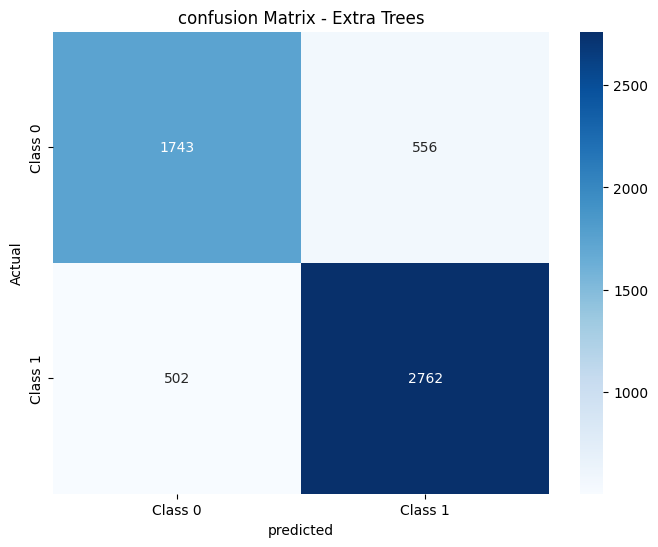

--------------------------------------------------------------------------------


<ipython-input-41-715ed80311bc>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies,palette='viridis')


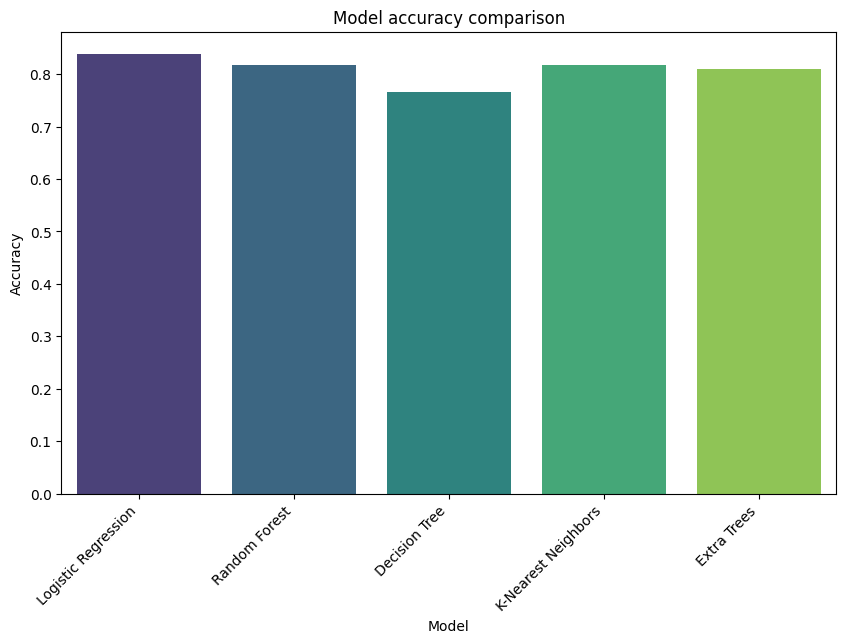

In [41]:
#define models to evaluate
models={
'Logistic Regression':LogisticRegression(),
'Random Forest':RandomForestClassifier(),
'Decision Tree':DecisionTreeClassifier(),
'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
'Extra Trees':ExtraTreesClassifier()
}
#initialize a list to store model names and accuracies
model_accuracies=[]

#loop through models, train, and evaluate
for model_name,model in models.items():
 print(f'Training and Evaluating { model_name}...')

#Train the model
 model.fit(x_train,y_train)

#predictions
 y_pred=model.predict(x_test)

#accuracy
 accuracy=accuracy_score(y_test,y_pred)
 model_accuracies.append((model_name,accuracy))
 print(f'Accuracy:{accuracy:.4f}')

#Classification Report
 print("\nClassification Report:")
 print(classification_report(y_test,y_pred))

#confusion Matrix
 conf_matrix=confusion_matrix(y_test,y_pred)

#plot confusion matrix
 plt.figure(figsize=(8,6))
 sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'])
 plt.title(f'confusion Matrix - {model_name}')
 plt.xlabel('predicted')
 plt.ylabel('Actual')
 plt.show()
#seperate a line for readablity between models
 print("-"*80)
#plotting the accuracies of all models
model_names=[model_name for model_name,_ in model_accuracies]
accuracies=[accuracy for _, accuracy in model_accuracies]
#create a bar plot for accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies,palette='viridis')
plt.title('Model accuracy comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45,ha='right')
plt.show()


F1-Score


One can combine presicion and recall into one score, which is called the F-score is computed with the harmonic mean of precisoon and recall. Note that it assigns much more weight to low values. As a result of that the classifier will only get a high F-score, if both recall and precison are high

##  logistics regression with sampling method

Training and Evaluating Logistic Regression with Oversampling(SMOTE)...
Accuarcy(oversampling -SMOTE):0.8089160524896638


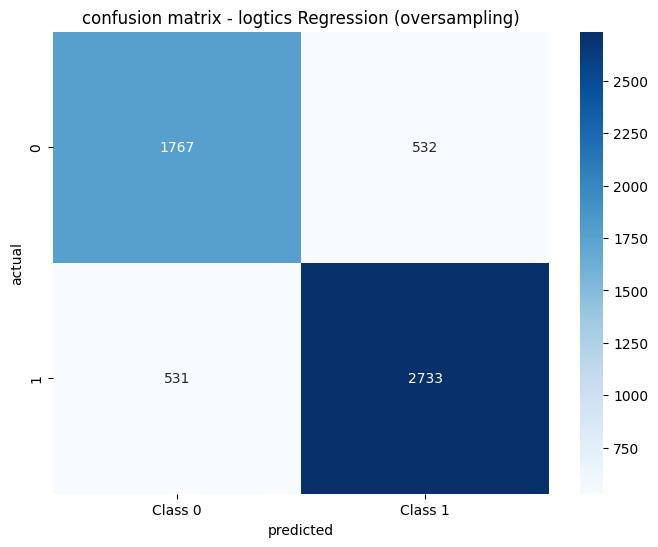

In [42]:
#Accuracy
print('Training and Evaluating Logistic Regression with Oversampling(SMOTE)...')
smote= SMOTE(random_state=42)

x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

#train model on resampled dataa
model.fit(x_train_resampled,y_train_resampled)
#predictions
y_pred_oversample=model.predict(x_test)

#Accuracy
accuracy_oversample=accuracy_score(y_test,y_pred_oversample)
print(f'Accuarcy(oversampling -SMOTE):{accuracy_oversample}')

#CONFUSIPON MATRIX
conf_matrix_oversample=confusion_matrix(y_test,y_pred_oversample)

#plot confussion matrix

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_oversample,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"])
plt.title('confusion matrix - logtics Regression (oversampling)')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## pickle

In [43]:
import pickle
from sklearn.tree import DecisionTreeClassifier
#train the model (assuming x_train and y_train are already defined)
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)
#save the trained model using pickle
with open ('RFC_model.pkl','wb') as file:
 pickle.dump(model,file)
 print("Model saved to 'RFC_model.pkl'.")

Model saved to 'RFC_model.pkl'.
